Parte I - Analizando la base

In [1]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [173]:
#Importamos el dataset
# RODRI os.chdir("C:/Users/rodri/OneDrive/Escritorio/Maestría/Big Data/BigData/TP2")
os.chdir("C:/Users/LENOVO/Desktop/udesa/3er timestre/Big Data/Tutoriales/TP2")
#Abrimos el dataset
df = pd.read_excel("usu_individual_T123.xlsx")

In [174]:
df=pd.read_excel("usu_individual_T123.xlsx")
print(df.head(3))
print(df.columns)
print(f'Cantidad de personas: {len(df)}')

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNORVWHLMKOCDEOHCH00720228  2023          1          1           5    0   
1  TQRMNOPSTHKMKPCDEOHCH00781447  2023          1          1           1    1   
2  TQRMNOQSXHMOKRCDEOHCH00803177  2023          1          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  CH03  CH04                 CH05  CH06  \
0      44       N          91      112     5     1  2015-10-29 00:00:00     7   
1      44       N          91      190     1     2  1939-05-29 00:00:00    83   
2      44       N          91      134     1     2  1992-12-20 00:00:00    30   

   CH07  CH08  CH09  CH10  CH11  CH12  CH13  CH14  CH15  CH15_COD  CH16  \
0     5   1.0     1     1     1     2     2   2.0     2       NaN     1   
1     4   1.0     1     2     0     4     1   NaN     2       NaN     1   
2     1   1.0     1     2     0     4     1   NaN     1       NaN     1   

   CH16_COD  NIVEL_ED  ESTADO  CAT_OCUP  CAT_INAC

In [175]:
#Filtro por aglomerados tomando solo los aglomerados 32 y 33
df=df[(df['AGLOMERADO']==32)| (df['AGLOMERADO'] == 33)]
pd.set_option('display.max_columns', None)
print(f'Cantidad de personas: {len(df)}')

Cantidad de personas: 7619


In [176]:
# Filtrar valores negativos - REVISAR SI HAY MÁS VALORES SIN SENTIDO
df = df[(df['IPCF'] >= 0) & (df['CH06'] >= 0)]
print(f'Cantidad de personas: {len(df)}')

Cantidad de personas: 7571


In [152]:
#Filtro por sexo y pongo los nombres utilizados en la encuesta

sex_composition = df['CH04'].replace({1: 'Varón', 2: 'Mujer'}).value_counts()


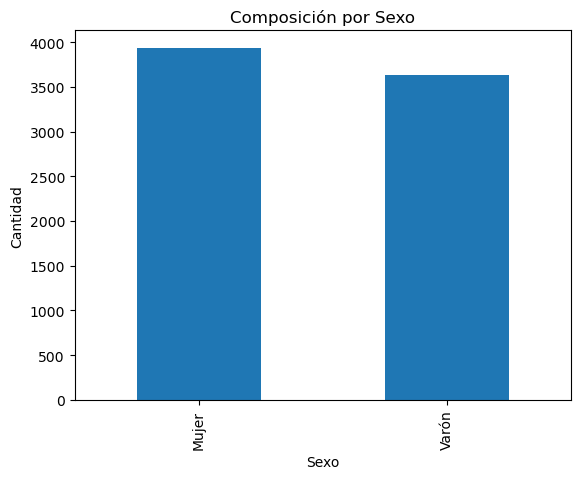

In [153]:
#Ahora realizo el gráfico de barras para ver la composición por sexo
sex_composition.plot(kind='bar')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.title('Composición por Sexo')
plt.show()

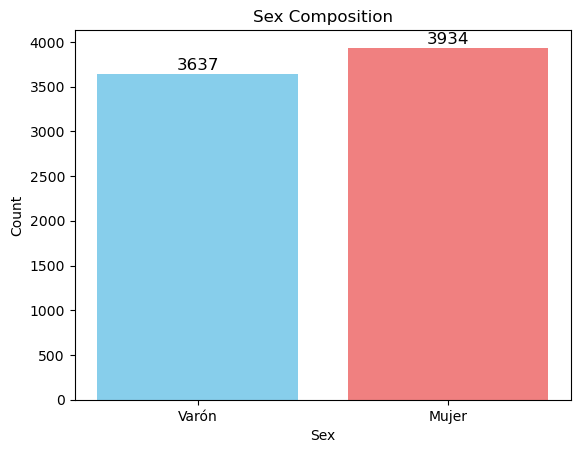

In [154]:
import matplotlib.pyplot as plt

# Sample data
sex_composition = df['CH04'].replace({1: 'Varón', 2: 'Mujer'}).value_counts()

# Define the desired order of bars
bar_order = ['Varón', 'Mujer']

# Create a figure and axis
fig, ax = plt.subplots()

# Define colors
colors = ['skyblue', 'lightcoral']

# Create the bar graph with the specified order
bars = ax.bar(bar_order, sex_composition[bar_order], color=colors)

# Add data labels above the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=12)

# Set labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Composition')


# Show the plot
plt.show()

In [155]:
#Armo la matriz de correlaciones
correlation_matrix = df[['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']].corr()
print(correlation_matrix)




              CH04      CH07      CH08  NIVEL_ED    ESTADO  CAT_INAC      IPCF
CH04      1.000000  0.000642 -0.019780  0.050053  0.111855  0.079618 -0.024220
CH07      0.000642  1.000000  0.071207 -0.081625  0.415376  0.407252 -0.043297
CH08     -0.019780  0.071207  1.000000 -0.000644  0.019759  0.088826 -0.069497
NIVEL_ED  0.050053 -0.081625 -0.000644  1.000000 -0.205541 -0.045002  0.151222
ESTADO    0.111855  0.415376  0.019759 -0.205541  1.000000  0.822162 -0.107492
CAT_INAC  0.079618  0.407252  0.088826 -0.045002  0.822162  1.000000 -0.110865
IPCF     -0.024220 -0.043297 -0.069497  0.151222 -0.107492 -0.110865  1.000000


In [177]:
# Saco Estado = no realizó entrevista; nivel_ed=9 (ns/nr); CH07=9, CH08=9; 
df_corr = df[(df['NIVEL_ED'] != 0) & (df['CH07'] != 9) & (df['CH08'] != 9)]
print(f'Cantidad de personas: {len(df_corr)}')
# No se ensucia la base por Ns/Nr en estos casos, ya que para el subgrupo de observaciones con las que estamos trabajando no hay 
#missing values. No hace falta corregir la matriz de correlación por esto.

Cantidad de personas: 7541


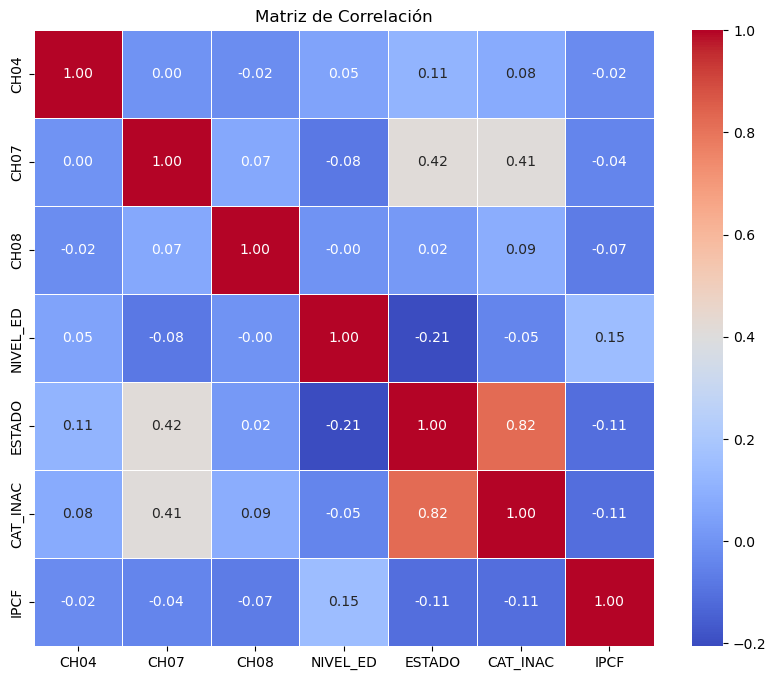

In [156]:
# CreO un mapa de calor usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

#AGREGARLE NOMBRE DESCRIPTIVO A LA VARIABLE. HERMOSO EL GRAFICO VIEJA

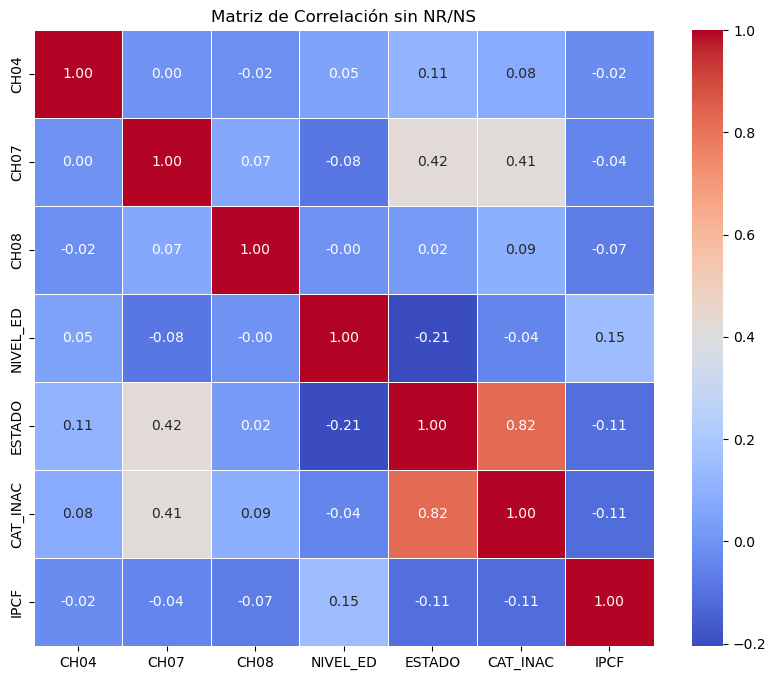

In [157]:
#¿Cuantos desocupados hay en la muestra? ¿Cu ́antos inactivos? ¿Cu ́al es
#la media de ingreso per c ́apita familiar (IPCF) seg ́un estado (ocupado,
#desocupado, inactivo)?


#Filtro por estado laboral
desocupados = df[df['ESTADO'] == 2]
inactivos = df[df['ESTADO'] == 3]
ocupados = df[df['ESTADO'] == 1]

#Veo sus ingresos per capita familiar según su estado
media_ipcf_ocupados = ocupados['IPCF'].mean()
media_ipcf_desocupados = desocupados['IPCF'].mean()
media_ipcf_inactivos = inactivos['IPCF'].mean()

#Imprimo los resultados y respuestas a las preguntas: 
print(f'Desocupados: {len(desocupados)}')
print(f'Inactivos: {len(inactivos)}')
print(f'Media IPCF (ocupados): ${media_ipcf_ocupados}')
print(f'Media IPCF (desocupados): ${media_ipcf_desocupados}')
print(f'Media IPCF (inactivos): ${media_ipcf_inactivos}')




#WARNINGG
#Acá me dio algo raro, los inactivos tienen un sueldo promedio mayor que los desocupados
#¿Por qué? ¿Será porque los inactivos son personas que no trabajan pero tienen ingresos como jubilados o pensionados?

#Fran - Lo hice en excel y me da lo mismo. Puede ser que los inactivos capture a los informales (que no están buscando trabajo) y los desempleados no. 


Desocupados: 286
Inactivos: 2837
Media IPCF (ocupados): $59579.44291512915
Media IPCF (desocupados): $25536.022202797205
Media IPCF (inactivos): $40067.99605216778


In [158]:
adulto_equiv_data = pd.read_excel("tabla_adulto_equiv.xlsx")
print(adulto_equiv_data.head(25))

              Edad  Mujeres  Varones
0   Menor de 1 año     0.35     0.35
1             1año     0.37     0.37
2           2 años     0.46     0.46
3           3 años     0.51     0.51
4           4 años     0.55     0.55
5           5 años     0.60     0.60
6           6 años     0.64     0.64
7           7 años     0.66     0.66
8           8 años     0.68     0.68
9           9 años     0.69     0.69
10         10 años     0.70     0.79
11         11 años     0.72     0.82
12         12 años     0.74     0.85
13         13 años     0.76     0.90
14         14 años     0.76     0.96
15         15 años     0.77     1.00
16         16 años     0.77     1.03
17         17 años     0.77     1.04
18    18 a 29 años     0.76     1.02
19    30 a 45 años     0.77     1.00
20    46 a 60 años     0.76     1.00
21    61 a 75 años     0.67     0.83
22  más de 75 años     0.63     0.74


In [159]:
# Cargar el archivo "tabla_adulto_equiv.xlsx" que contiene los valores de adulto equivalente
adulto_equiv_data = pd.read_excel("tabla_adulto_equiv.xlsx")
# Fusionar los datos de "adulto_equiv_data" con el DataFrame principal usando la columna 'Edad' y 'Sexo'
#df = df.merge(adulto_equiv_data, on=['Edad', 'Sexo'], how='left')

# Calcular el valor de "adulto equivalente" para cada persona multiplicando por el factor correspondiente
#df['ad_equiv'] = df['adulto_equiv'] * df['Cantidad']  # Suponiendo que tienes una columna 'Cantidad'

# Sumar los valores de "ad_equiv" por hogar y guardar el resultado en una nueva columna "ad_equiv_hogar"
#df['ad_equiv_hogar'] = df.groupby('NRO_HOGAR')['ad_equiv'].transform('sum')


In [160]:
#Agrego una columna vacía rangoetareo a la tabla original, que corresponda con la categorización de la tabla nueva. En base a eso (y género) vamos a matchear

#df["rangoetareo"]

#Función que lee los valores de edad en números CH06 y me lo impacta en la categoría etarea correspondiende de la nueva tabla.
def rango_edad(edad):
    if edad < 18:
        rangoetareo = str(edad)+" años"
    elif 17 < edad and edad < 30:
        rangoetareo = "18 a 29 años"
    elif 29 < edad and edad < 46:
        rangoetareo = "30 a 45 años"
    elif 45 < edad and edad < 61:
        rangoetareo = "46 a 60 años"
    elif 60 < edad and edad < 76:
        rangoetareo = "61 a 75 años"
    elif edad > 75:
        rangoetareo = "más de 75 años"
 #   elif for n in range(1,18):
  #      rangoetareo = 
        
    else:
        rangoetareo = "ERROR"
    return rangoetareo

#Aplico la función a mi tabla para crear la columna deseada
df['rango_etareo'] = df['CH06'].apply(rango_edad)


#Renombro la columna "edad", igual que la de la otra tabla
df = df.rename(columns={'rango_etareo': 'Edad'})
print(df.head(15))

#Para chequear no haber perdido datos
print(f'Cantidad de personas : {len(df)}')



                            CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
102  TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           1   
103  TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           2   
104  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           1   
105  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           2   
106  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           3   
107  TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           1   
108  TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           2   
181  TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           1   
182  TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           2   
183  TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           3   
278  TQRMNOTTTHKNLSCDEIIAD00780051  2023          1          1           1   
279  TQRMNOSRXHKMLUCDEIIAD00780093  2023          1          1  

In [161]:

merged_df = df.merge(adulto_equiv_data, on='Edad', how='left')
merged_df['adulto_equiv'] = np.where(merged_df['CH04'] == 1, merged_df['Varones'], merged_df['Mujeres'])
print(merged_df.head(30))




#Voy a hacer merge en base a dos variables, por lo que voy a crear una nueva que sea igual a la suma de ambas(rango_etareo y genero)
# y hacer el merge en base a eso. 
#df['genero'] = df['CH04'].astype(str)

#df["merge"] = df["rango_etareo"]+df["genero"]
#print(df.head(3))




                           CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
0   TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           1   
1   TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           2   
2   TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           1   
3   TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           2   
4   TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           3   
5   TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           1   
6   TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           2   
7   TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           1   
8   TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           2   
9   TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           3   
10  TQRMNOTTTHKNLSCDEIIAD00780051  2023          1          1           1   
11  TQRMNOSRXHKMLUCDEIIAD00780093  2023          1          1           1   

In [162]:
#Sumo para las personas de un mismo hogary loguardo como ad_equiv_hogar
merged_df['ad_equiv_hogar'] = merged_df.groupby('CODUSU')['adulto_equiv'].transform('sum')
print(merged_df.head(30))

                           CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
0   TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           1   
1   TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           2   
2   TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           1   
3   TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           2   
4   TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           3   
5   TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           1   
6   TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           2   
7   TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           1   
8   TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           2   
9   TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           3   
10  TQRMNOTTTHKNLSCDEIIAD00780051  2023          1          1           1   
11  TQRMNOSRXHKMLUCDEIIAD00780093  2023          1          1           1   

In [163]:
respondieron = merged_df[merged_df['ITF'] > 0]
#print(respondieron.head(3))
respondieron = respondieron.reset_index(drop=True)
norespondieron = merged_df[merged_df['ITF'] <= 0]
norespondieron = norespondieron.reset_index(drop=True)
#print(norespondieron.head(3))


print(f'Cantidad de personas: {len(merged_df)}')
#Cantidad de personas que no respondieron ingresos

print(f'Cantidad de personas que no respondieron ingresos: {len(norespondieron)}')
#Cantidad de personas que respondieron ingresos
print(f'Cantidad de personas que respondieron ingresos: {len(respondieron)}')

Cantidad de personas: 7571
Cantidad de personas que no respondieron ingresos: 3390
Cantidad de personas que respondieron ingresos: 4181


In [164]:
# Punto 1.4: Agregar columna que indica el ingreso necesario del hogar para no ser pobre
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * 53371.05
print(respondieron.head(3))




                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           1    1   
1  TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           2    1   
2  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  CH03  CH04                 CH05  CH06  \
0       1       S          33     1545     1     2  1957-10-17 00:00:00    65   
1       1       S          33     1545     2     1  1952-04-07 00:00:00    70   
2       1       S          33     8423     1     1  1986-09-26 00:00:00    36   

   CH07  CH08  CH09  CH10  CH11  CH12  CH13  CH14  CH15  CH15_COD  CH16  \
0     1   1.0     1     2     0     2     1   NaN     3      86.0     1   
1     1   1.0     1     2     0     2     1   NaN     1       NaN     1   
2     1   4.0     1     2     0     4     1   NaN     1       NaN     1   

   CH16_COD  NIVEL_ED  ESTADO  CAT_OCUP  CAT_INAC

In [165]:
# Punto 1.4: Columna que indica si una persona es pobre según el ingreso de su hogar
respondieron.loc[:, 'pobre'] = (respondieron['ingreso_necesario'] > respondieron['ITF']).astype(int)

print(respondieron.head(30))

                           CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
0   TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           1   
1   TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           2   
2   TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           1   
3   TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           2   
4   TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           3   
5   TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           1   
6   TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           2   
7   TQRMNOTTTHKNLSCDEIIAD00780051  2023          1          1           1   
8   TQRMNOQTWHMKMPCDEIIAD00801881  2023          1          1           1   
9   TQRMNOQTWHMKMPCDEIIAD00801881  2023          1          1           2   
10  TQRMNOQVTHLMQNCDEIJAH00719541  2023          1          1           1   
11  TQRMNOQPVHKOPLCDEIJAH00786447  2023          1          2           1   

                            CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
102  TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           1   
103  TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           2   
104  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           1   

     H15  REGION MAS_500  AGLOMERADO  PONDERA  CH03  CH04  \
102    1       1       S          33     1545     1     2   
103    1       1       S          33     1545     2     1   
104    1       1       S          33     8423     1     1   

                    CH05  CH06  CH07  CH08  CH09  CH10  CH11  CH12  CH13  \
102  1957-10-17 00:00:00    65     1   1.0     1     2     0     2     1   
103  1952-04-07 00:00:00    70     1   1.0     1     2     0     2     1   
104  1986-09-26 00:00:00    36     1   4.0     1     2     0     4     1   

     CH14  CH15  CH15_COD  CH16  CH16_COD  NIVEL_ED  ESTADO  CAT_OCUP  \
102   NaN     3      86.0     1       NaN         2       3     

Cantidad de personas que no respondieron ingresos: 11550
Cantidad de personas que respondieron ingresos: 36956
